In [1]:
import os
import cv2
import numpy as np
import pprint
import shutil
import socket
import os
import json
import glob
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300


## EDA

In [2]:
# hostname = socket.gethostname()
# if hostname == "HAITI":
#     repo_folder = "C:\\Users\\xin\\OneDrive - bwstaff\\xin\\yolov7"
#     dataset_folder = "D:\\xin\\datasets\\CV\\ECP"
# if hostname == "BALI":
#     repo_folder = "/home//OneDrive/xin/yolov7"
#     dataset_folder = "/storage/xin/datasets/CV/ECP"

In [38]:
# folder downloaded fron label studio afterlabeling
dataset_folder_original = '/storage/xin/datasets/CV/molti/Molti-labeled'

In [9]:
txt_path = '/storage/xin/datasets/CV/molti/Molti-labeled/labels/2a10cac7-molti63.txt'
with open(txt_path) as f:
    txt = f.readlines()
txt

['0 0.35931790499390986 0.6086757990867576 0.5481120584652863 0.36621004566210014\n',
 '2 0.18986814625088852 0.5513856995803308 0.37973629250177704 0.3069680893182364\n']

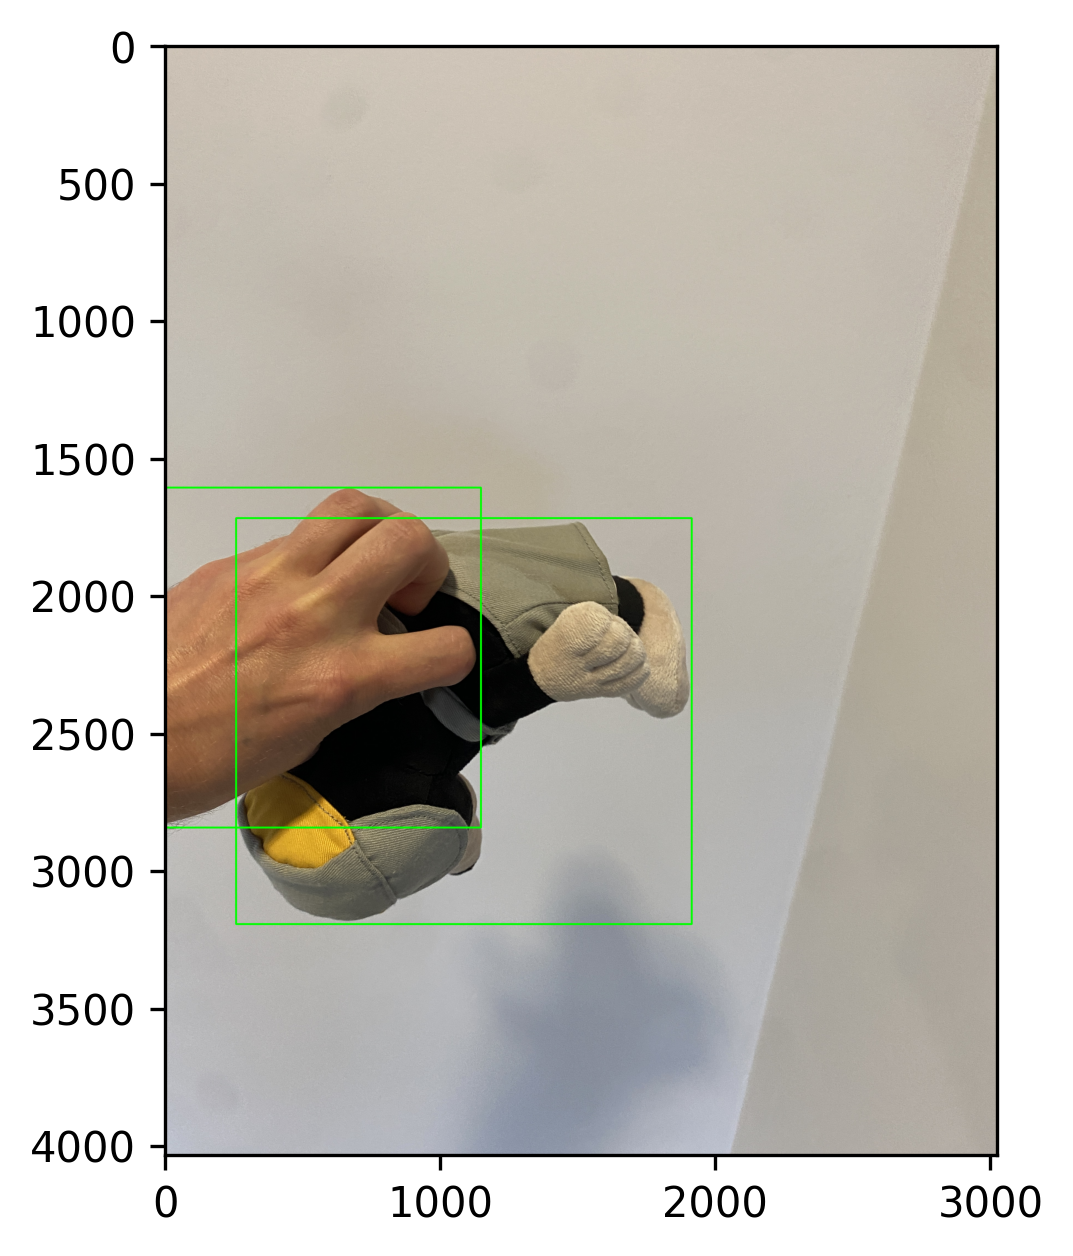

In [10]:

img_path = txt_path.replace('labels', 'images').replace('.txt', '.jpg')
img = cv2.imread(img_path)
height, width, channels = img.shape
for i in range(len(txt)):
    obj = txt[i].replace("\n","").split(' ')
    xc = int(width * float(obj[1]))
    yc = int(height * float(obj[2]))
    w = int(width * float(obj[3]))
    h = int(height * float(obj[4]))
    cv2.rectangle(img, (xc-w//2,yc-h//2),(xc+w//2,yc+h//2), color = (0, 255, 0),thickness = 5)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Instance statistics

In [ ]:
from collections import defaultdict
count=defaultdict(int)
for file in glob.glob(dataset_folder_original + '/labels/*.txt'):
    with open(file) as f:
        txt = f.readlines()
    for i in range(len(txt)):
        # for bottle
        if t[0] == '1':
            count['bottle'] += 1
        # for Molti (teddy bear in coco)
        elif t[0] == '0':
            count['Molti'] += 1
            flag = 1
        elif t[0] == '2':
            count['person'] += 1
       
print(count)

defaultdict(<class 'int'>, {'Molti': 79, 'person': 29, 'bottle': 13})


## preprocessing


## Rearange the data

In [53]:
# create dirs
dataset_folder = '/storage/xin/datasets/CV/molti/Molti-labeled-preprocessed'
train_dir_txt = '/storage/xin/datasets/CV/molti/Molti-labeled-preprocessed/labels/train'
test_dir_txt = '/storage/xin/datasets/CV/molti/Molti-labeled-preprocessed/labels/test'
train_dir_img = '/storage/xin/datasets/CV/molti/Molti-labeled-preprocessed/images/train'
test_dir_img = '/storage/xin/datasets/CV/molti/Molti-labeled-preprocessed/images/test'
os.makedirs(train_dir_txt,exist_ok =True)
os.makedirs(test_dir_txt,exist_ok =True)
os.makedirs(train_dir_img,exist_ok =True)
os.makedirs(test_dir_img,exist_ok =True)


In [71]:
test_set_file_nums = [2,6,31,36,45,68,78]
train_list = []
test_list = []
for txt_path in glob.glob(dataset_folder_original + '/labels/*.txt'):

    with open(txt_path) as f:
        txt = f.readlines()
    for i in range(len(txt)):
        t = txt[i]
        ## replace with corresponding label number in coco
        # for bottle
        if t[0] == '1':
            txt[i] = '39'+t[1:]
        # for Molti (teddy bear in coco)
        elif t[0] == '0':
            txt[i] = '77'+t[1:]
            flag = 1
        # for person
        elif t[0] == '2':
            txt[i] = '0'+t[1:]
    
    # get rid of the prefix in filename
    _, filename = os.path.split(txt_path)
    filename_new = filename.split('-')[1]

    # split train and test set
    filename_num = int(filename_new.split('.')[0][5:]) # start after 'molti' and end before '.txt'
    if filename_num in test_set_file_nums:
        txt_path_new = test_dir_txt+'/'+filename_new
        img_path_new = txt_path_new.replace('labels', 'images').replace('.txt', '.jpg')
        test_list.append(img_path_new)
    else:
        txt_path_new = train_dir_txt+'/'+filename_new
        img_path_new = txt_path_new.replace('labels', 'images').replace('.txt', '.jpg')
        train_list.append(img_path_new)
    
    # save the label file
    with open(txt_path_new, 'w') as f:
        f.writelines(txt)
    
    # copy the image file to new folder
    img_path = txt_path.replace('labels', 'images').replace('.txt', '.jpg')
    shutil.copy(img_path, img_path_new)

# write all train img file locations 
with open(os.path.join(dataset_folder, 'train.txt'), 'w') as f:
    for img_path in train_list:
        f.write(img_path.replace('Molti-labeled-preprocessed','.') + '\n') # replace with relative path      

# write all val img file locations to new txt file 
with open(os.path.join(dataset_folder, 'test.txt'), 'w') as f:
    for img_path in test_list:
        f.write(img_path.replace('Molti-labeled-preprocessed','.') + '\n') # replace with relative path 

# copy test.txt to val.txt
shutil.copy(os.path.join(dataset_folder, 'test.txt'),os.path.join(dataset_folder, 'val.txt'))

'Molti-labeled-preprocessed\\val.txt'